# Project Template

A guide for applying machine learning on a dataset.

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [0]:
boston = load_boston()

df = pd.DataFrame(data= np.c_[boston['data'], boston['target']],
                     columns= boston['feature_names'].tolist() + ['target'])

In [0]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
X = df.iloc[:, 0:13]
Y = df.iloc[:, -1]

## Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?

One of the major goals of regression analysis is to investigate and establish the relationships between two or more variables. In our case we are trying to predict the sales of houses through different features.

## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

In [0]:
print (df.shape)

(506, 14)


We could see 506 instances and 14 features.

In [0]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [0]:
df.groupby('target').size()

target
5.0      2
5.6      1
6.3      1
7.0      2
7.2      3
7.4      1
7.5      1
8.1      1
8.3      2
8.4      2
8.5      2
8.7      1
8.8      2
9.5      1
9.6      1
9.7      1
10.2     3
10.4     2
10.5     2
10.8     1
10.9     2
11.0     1
11.3     1
11.5     1
11.7     2
11.8     2
11.9     2
12.0     1
12.1     1
12.3     1
        ..
35.2     1
35.4     2
36.0     1
36.1     1
36.2     2
36.4     1
36.5     1
37.0     1
37.2     1
37.3     1
37.6     1
37.9     1
38.7     1
39.8     1
41.3     1
41.7     1
42.3     1
42.8     1
43.1     1
43.5     1
43.8     1
44.0     1
44.8     1
45.4     1
46.0     1
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
Length: 229, dtype: int64

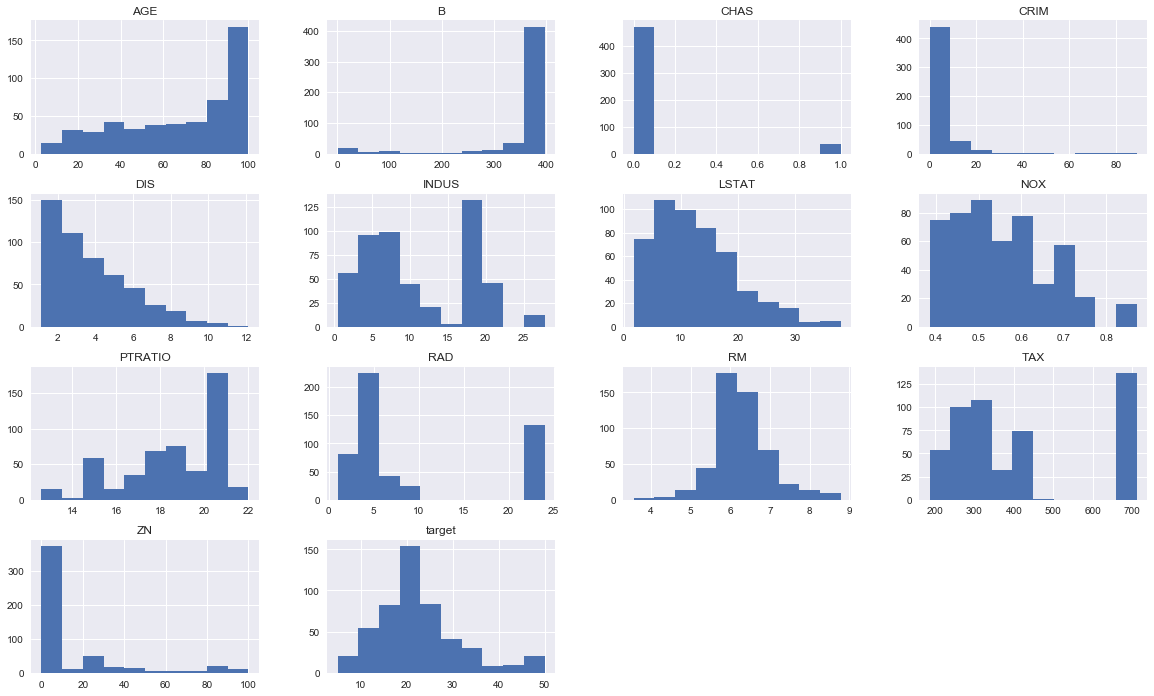

In [0]:
df.hist(figsize = (20, 12))
plt.show()

Histograms groups data into bins and provide us a count of the number of observations in each bin. From the shape of the bins we can quickly get a feeling for whether an attribute is Gaussian, skewed or has an exponential distribution. The DIS feature we can see that it has an exponential distirbution.

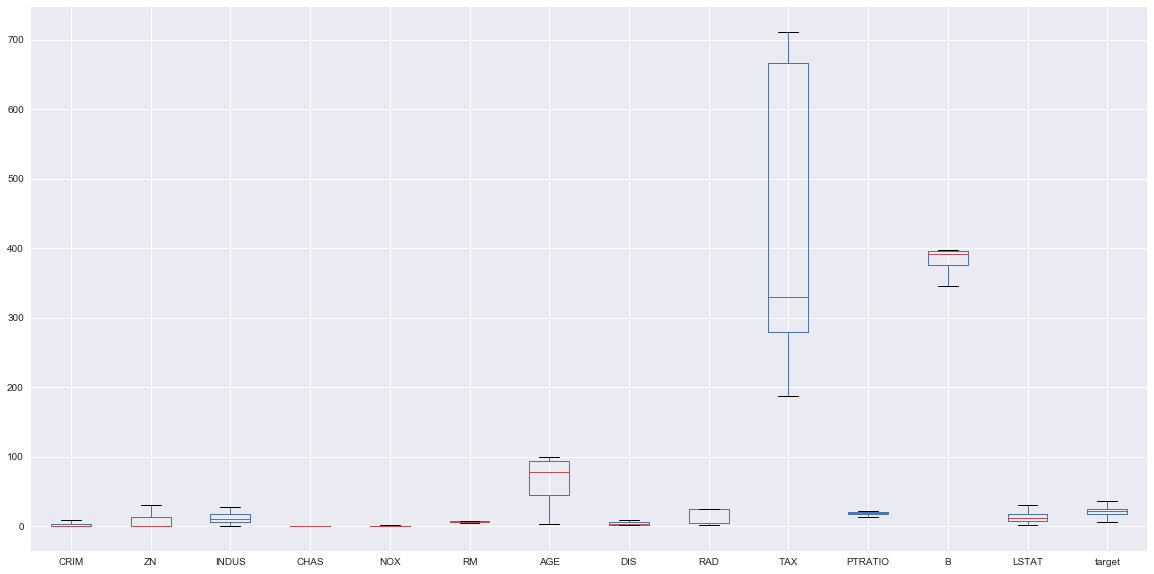

In [0]:
df.plot(kind = 'box', figsize = (20,10))
plt.show()

Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

In [0]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


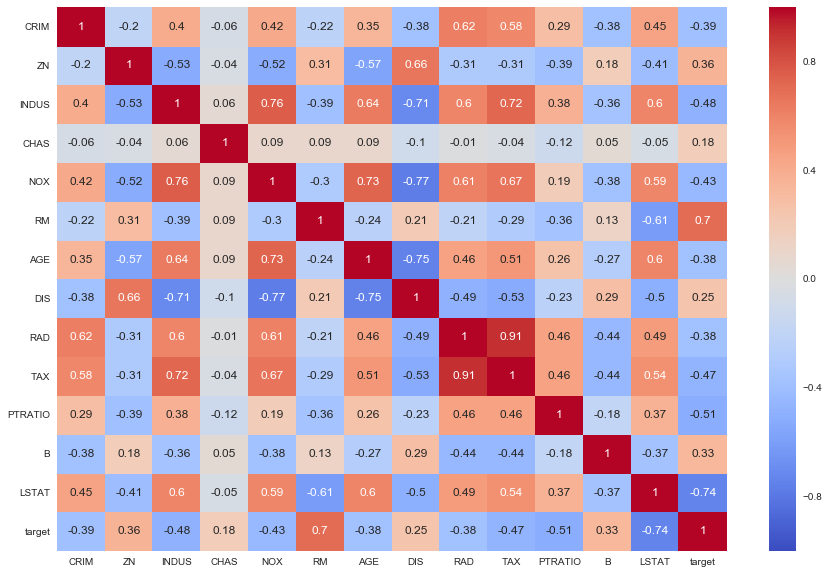

In [0]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":12})

From this we can see that the two variables with the strongest correlation to target are the LSTAT(% lower status of the population) and RM (average number of rooms per dwelling).

We can also use the heatmap to check for correlation between variables so that we don’t include multicollinearity into a linear regression. For example both RAD and TAX are highly correlated (0.91) so these both shouldn’t be used in a linear regression at the same time.

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

In [0]:
df.isnull().any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
target     False
dtype: bool

We have not missing values in our dataset

## Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.

In [0]:
normalized_X = preprocessing.normalize(X)

## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

In [0]:
kfold = KFold(n_splits=10, random_state=7)

In [0]:
models = []
models.append(('LR',      LinearRegression()))
models.append(('RIDGE',   Ridge()))
models.append(('LASSO',   Lasso()))
models.append(('ELASTIC', ElasticNet()))
models.append(('kNN',     KNeighborsRegressor()))
models.append(('DT',      DecisionTreeRegressor()))
models.append(('SVM',     SVR()))

In [0]:
# The scoring function to use
scoring = 'neg_mean_squared_error'

In [0]:
results = []
names   = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, normalized_X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))

 LR: -29.567845 (+/- 38.246951)
RIDGE: -63.643530 (+/- 48.351411)
LASSO: -92.133823 (+/- 66.356070)
ELASTIC: -90.952901 (+/- 65.601469)
kNN: -88.534235 (+/- 51.591284)
 DT: -38.290471 (+/- 27.611057)
SVM: -80.419534 (+/- 67.897674)


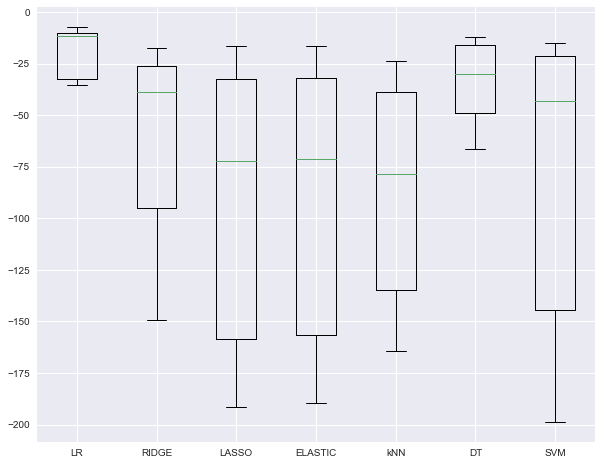

In [0]:
plt.figure(figsize = (10,8))
plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()

## Step 7: Model Training
Apply ensembles and improve performance by hyperparameter optimisation.

In [0]:
model = LinearRegression()
parameters = {"fit_intercept": [True, False], "normalize": [True, False], "copy_X": [True, False]}
grid = GridSearchCV(estimator=model, param_grid=parameters)
grid.fit(normalized_X, Y)
# print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

-0.439351814398
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.

In [0]:
model1 = LinearRegression(fit_intercept = True, normalize = False, copy_X = True)

In [0]:
model1.fit(normalized_X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [0]:
model1.score(normalized_X, Y)

0.74400267773946549